In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {
    "IQ": [78, 84, 84, 85, 87, 91, 92, 94, 94, 96, 99, 105, 105, 106, 108, 112, 113, 115, 118, 134],
    "Job_Performance_Ratings": [9, 13, 10, 8, 7, 7, 9, 9, 11, 7, 7, 10, 11, 15, 10, 8, 12, 14, 16, 12],
    "MCAR": [np.nan, 13, np.nan, 8, 7, 7, 9, 9, 11, np.nan, 7, 10, np.nan, 15, 10, np.nan, 12, 14, 16, np.nan],
    "MAR": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 9, 9, 11, 7, 7, 10, 11, 15, 10, 8, 12, 14, 16, 12],
    "MNAR": [9, 13, 10, np.nan, np.nan, np.nan, 9, 9, 11, np.nan, np.nan, 10, 11, 15, 10, np.nan, 12, 14, 16, 12]
}
# Create DataFrame
df = pd.DataFrame(data)
df

,IQ,Job_Performance_Ratings,MCAR,MAR,MNAR
0,78,9,NaN,NaN,9.0
1,84,13,13.0,NaN,13.0
2,84,10,NaN,NaN,10.0
3,85,8,8.0,NaN,NaN
4,87,7,7.0,NaN,NaN
5,91,7,7.0,NaN,NaN
6,92,9,9.0,9.0,9.0
7,94,9,9.0,9.0,9.0
8,94,11,11.0,11.0,11.0
9,96,7,NaN,7.0,NaN


In [3]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [8]:
si = SimpleImputer(strategy='mean').set_output(transform='pandas')
si

SimpleImputer()

In [9]:
si.fit_transform(df)

,IQ,Job_Performance_Ratings,MCAR,MAR,MNAR
0,78.0,9.0,10.571429,10.785714,9.0
1,84.0,13.0,13.000000,10.785714,13.0
2,84.0,10.0,10.571429,10.785714,10.0
3,85.0,8.0,8.000000,10.785714,11.5
4,87.0,7.0,7.000000,10.785714,11.5
5,91.0,7.0,7.000000,10.785714,11.5
6,92.0,9.0,9.000000,9.000000,9.0
7,94.0,9.0,9.000000,9.000000,9.0
8,94.0,11.0,11.000000,11.000000,11.0
9,96.0,7.0,10.571429,7.000000,11.5


In [10]:
from sklearn.compose import ColumnTransformer

In [13]:
ct = ColumnTransformer([('Mean_Imputauion',si,['MCAR'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('Mean_Imputauion', SimpleImputer(), ['MCAR'])],
                  verbose_feature_names_out=False)

In [14]:
ct.fit_transform(df)

,MCAR,IQ,Job_Performance_Ratings,MAR,MNAR
0,10.571429,78,9,NaN,9.0
1,13.000000,84,13,NaN,13.0
2,10.571429,84,10,NaN,10.0
3,8.000000,85,8,NaN,NaN
4,7.000000,87,7,NaN,NaN
5,7.000000,91,7,NaN,NaN
6,9.000000,92,9,9.0,9.0
7,9.000000,94,9,9.0,9.0
8,11.000000,94,11,11.0,11.0
9,10.571429,96,7,7.0,NaN


In [15]:
si =SimpleImputer(strategy='median')
si

SimpleImputer(strategy='median')

In [16]:
ct = ColumnTransformer([('Median_Imputauion',si,['MCAR'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('Median_Imputauion',
                                 SimpleImputer(strategy='median'), ['MCAR'])],
                  verbose_feature_names_out=False)

In [17]:
ct.fit_transform(df)

,MCAR,IQ,Job_Performance_Ratings,MAR,MNAR
0,10.0,78,9,NaN,9.0
1,13.0,84,13,NaN,13.0
2,10.0,84,10,NaN,10.0
3,8.0,85,8,NaN,NaN
4,7.0,87,7,NaN,NaN
5,7.0,91,7,NaN,NaN
6,9.0,92,9,9.0,9.0
7,9.0,94,9,9.0,9.0
8,11.0,94,11,11.0,11.0
9,10.0,96,7,7.0,NaN


In [16]:
cls_data = pd.DataFrame({'height': [180, 165, 170, 185, 160, 175],
        'weight': [80, 55, 65, 90, 50, 75],
        'gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male']})
cls_data

,height,weight,gender
0,180,80,Male
1,165,55,Female
2,170,65,Female
3,185,90,Male
4,160,50,Female
5,175,75,Male


In [5]:
cls_data.iloc[2, 1] = np.nan

In [6]:
cls_data

,height,weight,gender
0,180,80.0,Male
1,165,55.0,Female
2,170,NaN,Female
3,185,90.0,Male
4,160,50.0,Female
5,175,75.0,Male


In [4]:
knn = KNNImputer()
knn

KNNImputer()

In [7]:
knn.fit_transform(cls_data[['height','weight']])

array([[180.,  80.],
       [165.,  55.],
       [170.,  70.],
       [185.,  90.],
       [160.,  50.],
       [175.,  75.]])

In [12]:
cls_data.iloc[3,0]=np.nan

In [13]:
cls_data

,height,weight,gender
0,180.0,80.0,Male
1,165.0,55.0,Female
2,170.0,NaN,Female
3,NaN,90.0,Male
4,160.0,50.0,Female
5,175.0,75.0,Male


In [15]:
knn.fit_transform(cls_data[['height','weight']])

array([[180.,  80.],
       [165.,  55.],
       [170.,  70.],
       [170.,  90.],
       [160.,  50.],
       [175.,  75.]])

In [18]:
cls_data['gender'] = cls_data['gender'].map({'Male':0,'Female':1})

In [19]:
cls_data

,height,weight,gender
0,180,80,0
1,165,55,1
2,170,65,1
3,185,90,0
4,160,50,1
5,175,75,0


In [26]:
cls_data.iloc[2,2] = np.nan

In [31]:
cls_data['gender'].astype('object')

0    0.0
1    1.0
2    NaN
3    0.0
4    1.0
5    0.0
Name: gender, dtype: object

In [32]:
cls_data

,height,weight,gender
0,180,80,0.0
1,165,55,1.0
2,170,65,NaN
3,185,90,0.0
4,160,50,1.0
5,175,75,0.0


In [33]:
knn.fit_transform(cls_data)

array([[180. ,  80. ,   0. ],
       [165. ,  55. ,   1. ],
       [170. ,  65. ,   0.4],
       [185. ,  90. ,   0. ],
       [160. ,  50. ,   1. ],
       [175. ,  75. ,   0. ]])

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
iter_imputer = IterativeImputer(estimator=KNeighborsClassifier()).set_output(transform='pandas')
iter_imputer

IterativeImputer(estimator=KNeighborsClassifier())

In [40]:
iter_imputer.fit_transform(cls_data)

,height,weight,gender
0,180.0,80.0,0.0
1,165.0,55.0,1.0
2,170.0,65.0,0.0
3,185.0,90.0,0.0
4,160.0,50.0,1.0
5,175.0,75.0,0.0


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
iter_imputer = IterativeImputer(estimator=DecisionTreeClassifier(),max_iter=100,initial_strategy='most_frequent').set_output(transform='pandas')
iter_imputer

IterativeImputer(estimator=DecisionTreeClassifier(),
                 initial_strategy='most_frequent', max_iter=100)

In [45]:
iter_imputer.fit_transform(cls_data)

,height,weight,gender
0,180.0,80.0,0.0
1,165.0,55.0,1.0
2,170.0,65.0,1.0
3,185.0,90.0,0.0
4,160.0,50.0,1.0
5,175.0,75.0,0.0


---

In [46]:
df = pd.read_csv(r"C:\Users\HP\Downloads\credit_approval_uci.csv")
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,NaN,NaN,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,NaN,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [48]:
#segregate data into x,y
x = df.drop('target',axis = 1)
y = df['target']
x.shape,y.shape

((690, 15), (690,))

In [49]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((552, 15), (138, 15), (552,), (138,))

In [89]:
cat_cols = x_train.select_dtypes('object').columns

In [76]:
# targets are not used at the time of missing value imputation y
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe

OrdinalEncoder()

In [77]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 177 to 215
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      540 non-null    object 
 1   A2      542 non-null    float64
 2   A3      480 non-null    float64
 3   A4      547 non-null    object 
 4   A5      547 non-null    object 
 5   A6      544 non-null    object 
 6   A7      544 non-null    object 
 7   A8      484 non-null    float64
 8   A9      472 non-null    object 
 9   A10     472 non-null    object 
 10  A11     552 non-null    int64  
 11  A12     552 non-null    object 
 12  A13     552 non-null    object 
 13  A14     543 non-null    float64
 14  A15     552 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 69.0+ KB


In [80]:
num_cols = x_train.select_dtypes(['float64','int64']).columns
num_cols

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object')

In [81]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Cat_Enc',oe,['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

In [82]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('Cat_Enc', OrdinalEncoder(),
                                 ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10',
                                  'A12', 'A13'])],
                  verbose_feature_names_out=False)

In [83]:
ct.fit_transform(x_train)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A2,A3,A8,A11,A14,A15
177,0.0,1.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,26.08,8.665,1.415,0,160.0,150
401,1.0,1.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,28.92,NaN,0.290,0,220.0,140
375,0.0,2.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,20.83,0.500,1.000,0,260.0,0
299,1.0,1.0,0.0,1.0,7.0,0.0,1.0,1.0,0.0,22.17,NaN,3.335,2,180.0,173
45,1.0,1.0,0.0,1.0,3.0,1.0,NaN,1.0,0.0,54.33,6.750,2.625,11,0.0,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1.0,1.0,0.0,0.0,7.0,1.0,0.0,1.0,0.0,31.83,2.500,7.500,0,523.0,0
455,1.0,1.0,0.0,12.0,7.0,0.0,0.0,0.0,0.0,36.17,18.125,0.085,0,320.0,3552
502,0.0,1.0,0.0,5.0,2.0,1.0,1.0,0.0,0.0,64.08,0.165,0.000,1,232.0,100
445,0.0,1.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,NaN,11.250,0.000,0,NaN,5200


In [85]:
x_train = ct.fit_transform(x_train)
x_train

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A2,A3,A8,A11,A14,A15
177,0.0,1.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,26.08,8.665,1.415,0,160.0,150
401,1.0,1.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,28.92,NaN,0.290,0,220.0,140
375,0.0,2.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,20.83,0.500,1.000,0,260.0,0
299,1.0,1.0,0.0,1.0,7.0,0.0,1.0,1.0,0.0,22.17,NaN,3.335,2,180.0,173
45,1.0,1.0,0.0,1.0,3.0,1.0,NaN,1.0,0.0,54.33,6.750,2.625,11,0.0,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1.0,1.0,0.0,0.0,7.0,1.0,0.0,1.0,0.0,31.83,2.500,7.500,0,523.0,0
455,1.0,1.0,0.0,12.0,7.0,0.0,0.0,0.0,0.0,36.17,18.125,0.085,0,320.0,3552
502,0.0,1.0,0.0,5.0,2.0,1.0,1.0,0.0,0.0,64.08,0.165,0.000,1,232.0,100
445,0.0,1.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,NaN,11.250,0.000,0,NaN,5200


In [86]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [93]:
iter_imputer_cat = IterativeImputer(estimator=RandomForestClassifier(),max_iter=100,initial_strategy='most_frequent')
iter_imputer_cat

IterativeImputer(estimator=RandomForestClassifier(),
                 initial_strategy='most_frequent', max_iter=100)

In [94]:
iter_imputer_num = IterativeImputer(estimator=RandomForestRegressor(),max_iter=100,initial_strategy='mean')
iter_imputer_num

IterativeImputer(estimator=RandomForestRegressor(), max_iter=100)

In [95]:
ct2 = ColumnTransformer([('Cat_imput',iter_imputer_cat,cat_cols),('Num_impt',iter_imputer_num,num_cols)],
                        remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

In [96]:
ct2

ColumnTransformer(remainder='passthrough',
                  transformers=[('Cat_imput',
                                 IterativeImputer(estimator=RandomForestClassifier(),
                                                  initial_strategy='most_frequent',
                                                  max_iter=100),
                                 Index([], dtype='object')),
                                ('Num_impt',
                                 IterativeImputer(estimator=RandomForestRegressor(),
                                                  max_iter=100),
                                 Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object'))],
                  verbose_feature_names_out=False)

In [98]:
x_train_transform = ct2.fit_transform(x_train)
x_train_transform.head()

,A2,A3,A8,A11,A14,A15,A1,A4,A5,A6,A7,A9,A10,A12,A13
177,26.08,8.6650,1.415,0.0,160.0,150.0,0.0,1.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0
401,28.92,1.7654,0.290,0.0,220.0,140.0,1.0,1.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0
375,20.83,0.5000,1.000,0.0,260.0,0.0,0.0,2.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0
299,22.17,3.0038,3.335,2.0,180.0,173.0,1.0,1.0,0.0,1.0,7.0,0.0,1.0,1.0,0.0
45,54.33,6.7500,2.625,11.0,0.0,284.0,1.0,1.0,0.0,1.0,3.0,1.0,NaN,1.0,0.0


In [99]:
from sklearn.pipeline import Pipeline

In [100]:
pl = Pipeline([('ct1',ct),('ct2',ct2)])
pl

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('ct1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat_Enc', OrdinalEncoder(),
                                                  ['A1', 'A4', 'A5', 'A6', 'A7',
                                                   'A9', 'A10', 'A12',
                                                   'A13'])],
                                   verbose_feature_names_out=False)),
                ('ct2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat_imput',
                                                  IterativeImputer(estimator=RandomForestClassifier(),
                                                                   initial_strategy='most_frequent',
                                                                   max_iter=100),
                                                  Index([], dtype='object')),
                                                 ('Num_impt',
                                                  IterativeImputer(estimator=RandomForestRegressor(),
                                                                   max_iter=100),
                                                  Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object'))],
                                   verbose_feature_names_out=False))])

In [102]:
x_test_transformed = pl.fit_transform(x_test)
x_test_transformed.head()

,A2,A3,A8,A11,A14,A15,A1,A4,A5,A6,A7,A9,A10,A12,A13
53,34.92,2.500,0.00000,0.0,239.0,200.0,1.0,0.0,0.0,11.0,6.0,1.0,0.0,1.0,0.0
52,37.42,2.040,0.04000,0.0,400.0,5800.0,1.0,0.0,0.0,11.0,6.0,1.0,0.0,1.0,0.0
407,19.58,0.665,1.00000,1.0,2000.0,2.0,0.0,1.0,1.0,1.0,6.0,NaN,1.0,0.0,0.0
191,42.00,0.205,5.12500,0.0,400.0,0.0,1.0,0.0,0.0,6.0,3.0,1.0,0.0,0.0,0.0
492,39.25,9.500,3.07735,14.0,240.0,4607.0,1.0,0.0,0.0,9.0,6.0,1.0,1.0,0.0,0.0


## Outliers

In [2]:
# Generate synthetic data with 2 clusters
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300,
                  centers=2,
                  cluster_std=2.3,
                  random_state = 2)

# Add outliers to the data
# Define outliers for each cluster
outliers_cluster_0 = np.array([[10, 10], [12, 9], [11, 10]])
outliers_cluster_1 = np.array([[-10, -8], [-9, -9], [-10, -12]])


X = np.vstack([X, outliers_cluster_0, outliers_cluster_1])
y = np.hstack([y, [0, 0, 0, 1, 1, 1]])  # Assign outliers to clusters


In [3]:
data = pd.DataFrame(X, columns = ['x1', 'x2'])
data['y'] = y
data.head()

,x1,x2,y
0,-1.280080,-8.234064,0
1,-0.958682,-0.531011,1
2,1.975390,-0.357480,1
3,1.291038,-10.112232,0
4,2.878985,-2.745125,1


In [5]:
import seaborn as sns

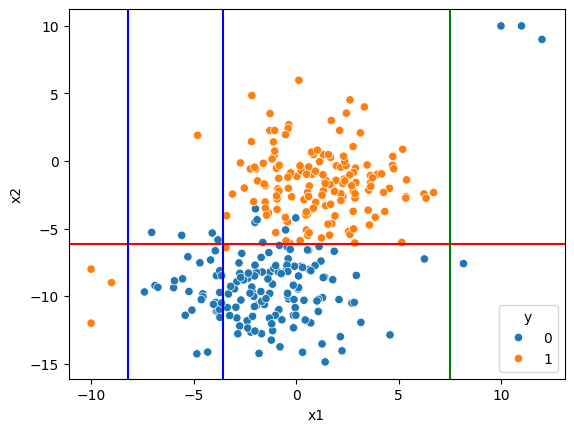

In [27]:
sns.scatterplot(data=data ,x='x1',y='x2',hue='y')
plt.axhline(-6.171,color='r')
plt.axvline(-8.198,color='b')
plt.axvline(-3.569,color='b')
plt.axvline(7.488,color='g')

In [9]:
x = data.drop('y',axis=1)
y = data['y']

In [14]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

In [17]:
dt = DecisionTreeClassifier(max_depth=4)
dt

DecisionTreeClassifier(max_depth=4)

In [18]:
dt.fit(x,y)

DecisionTreeClassifier(max_depth=4)

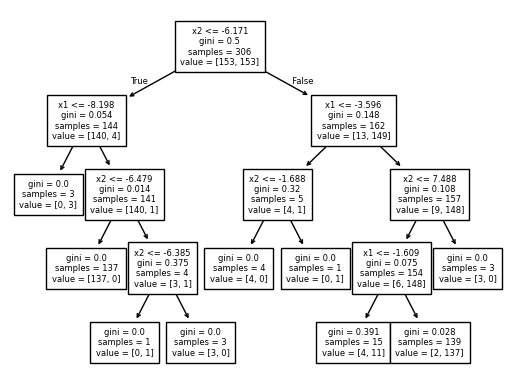

In [21]:
plot_tree(dt,feature_names=['x1','x2'],fontsize=6);

In [28]:
from sklearn.ensemble import IsolationForest

In [42]:
If = IsolationForest(contamination=0.5)
If

IsolationForest(contamination=0.5)

In [43]:
If.fit(x)

IsolationForest(contamination=0.5)

In [44]:
 pred = If.predict(x)
pred

array([ 1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,
        1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,
        1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
        1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,
        1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1

In [34]:
idx = np.where(pred<0) #index values of outliers
idx

(array([  5,   6,  20,  24,  25,  49,  58,  68,  77, 101, 112, 114, 123,
        128, 136, 143, 155, 161, 164, 166, 187, 207, 208, 209, 213, 228,
        230, 237, 245, 249, 252, 259, 261, 280, 286, 287, 292, 294, 300,
        301, 302, 303, 304, 305], dtype=int64),)

In [39]:
Outlier_data = x.iloc[idx]
Outlier_data

,x1,x2
5,-1.267088,3.505818
6,-6.880067,-9.222204
20,2.454586,3.541575
24,3.336299,4.001918
25,6.243091,-2.433843
49,-5.277409,-7.087580
58,-2.838756,-12.792185
68,-5.972845,-9.375088
77,-1.805071,-14.241584
101,-5.576710,-5.499751


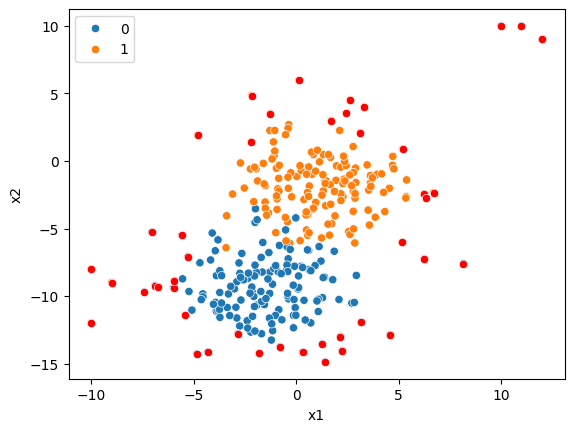

In [46]:
sns.scatterplot(data=data,x='x1',y='x2',hue='y')
sns.scatterplot(data=Outlier_data,x='x1',y='x2',color='r');

---

#### Outlier Detection

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\creditcardfraud\creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape

(284807, 31)

In [9]:
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [11]:
X = df.drop('Class',axis=1)
y = df['Class']

In [12]:
# Model
def predict(X):#Features
    return np.zeros(df.shape[0])


In [18]:
pred = predict(df['V4'])

In [19]:
pred.shape

(284807,)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(pred,y)

0.9982725143693799

- Due to Data imbalence accoracy is 99 even it is a dumb model

In [22]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [24]:
df.duplicated().sum()

1081

In [25]:
df.drop_duplicates(inplace=True)

In [27]:
df['Class'].value_counts(normalize=True)

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

In [29]:
X = df.drop('Class',axis=1)
y = df['Class']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((226980, 30), (56746, 30), (226980,), (56746,))

In [32]:
from sklearn.ensemble import IsolationForest

In [35]:
If = IsolationForest(n_estimators=200)
If

IsolationForest(n_estimators=200)

In [36]:
If.fit(X_train)

IsolationForest(n_estimators=200)

In [37]:
#Anamoly scores
If.decision_function(X_train)

array([0.09050836, 0.09749954, 0.09179501, ..., 0.10029869, 0.14150204,
       0.10213973])

In [39]:
pred = If.predict(X_train)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
out = np.where(pred < 0)
out 

(array([     5,     31,     45, ..., 226947, 226951, 226973], dtype=int64),)

In [42]:
out[0].shape

(7728,)

- Actually we have less than one percent of outliers from value counts

In [43]:
If = IsolationForest(n_estimators=200,contamination=0.001667)
If

IsolationForest(contamination=0.001667, n_estimators=200)

In [44]:
If.fit(X_train)

IsolationForest(contamination=0.001667, n_estimators=200)

In [45]:
pred = If.predict(X_train)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
out = np.where(pred < 0)
out[0].shape

(379,)

In [48]:
y_pred = If.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
np.where(y_pred < 0,1,0)

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
y_pred = np.where(y_pred < 0,1,0)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
accuracy_score(y_pred,y_test)

0.9975328657526522

In [53]:
#LOF
from sklearn.neighbors import LocalOutlierFactor

In [62]:
lof = LocalOutlierFactor(contamination=0.001667)

In [63]:
lof.fit(X_train)

LocalOutlierFactor(contamination=0.001667)

In [64]:
y_pred = lof.fit_predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [65]:
y_pred = np.where(y_pred<0,1,0)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
accuracy_score(y_pred,y_test)

0.9966869911535615

---

#### Imbalenced Data

In [2]:
from sklearn.datasets import load_breast_cancer

In [4]:
df = load_breast_cancer()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
X = df.data
X.shape

(569, 30)

In [7]:
y = df.target
y.shape

(569,)

In [8]:
df = pd.DataFrame(X,columns=df.feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df['target'].value_counts(normalize=True)

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [19]:
#Training data
pd.Series(y_train).value_counts()#class imbalence

1    285
0    170
Name: count, dtype: int64

In [15]:
from imblearn.over_sampling import RandomOverSampler

In [16]:
ros = RandomOverSampler()
ros

RandomOverSampler()

In [18]:
X_train_sampled,y_train_sampled = ros.fit_resample(X_train,y_train)
X_train_sampled.shape,y_train_sampled.shape  # y_train intially have c1->285,c2->170 for minority class c2 data points added randomly becomes 285

((570, 30), (570,))

In [21]:
pd.Series(y_train_sampled).value_counts()

1    285
0    285
Name: count, dtype: int64

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rc = RandomForestClassifier()

In [30]:
rc.fit(X_train_sampled,y_train_sampled)

RandomForestClassifier()

In [26]:
y_pred = rc.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1])

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_pred,y_test)

0.9473684210526315

In [33]:
#adding noise to data by param shrinkage = 10
ros1 = RandomOverSampler(shrinkage = 10)
ros1

RandomOverSampler(shrinkage=10)

In [34]:
X_train_sampled,y_train_sampled = ros1.fit_resample(X_train,y_train)
X_train_sampled.shape,y_train_sampled.shape

((570, 30), (570,))

In [35]:
rc.fit(X_train_sampled,y_train_sampled)

RandomForestClassifier()

In [37]:
y_pred1 = rc.predict(X_test)
y_pred1

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [38]:
accuracy_score(y_pred1,y_test)

0.9473684210526315